In [19]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import sys
import pandas as pd
from skimage import morphology
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
from skimage.feature.texture import local_binary_pattern

from skimage.color import rgb2gray

In [27]:
im = plt.imread('data/example_image/ISIC_0001769.jpg')
seg=plt.imread('data/example_segmentation/ISIC_0001769_segmentation.png')

(3024, 2016)


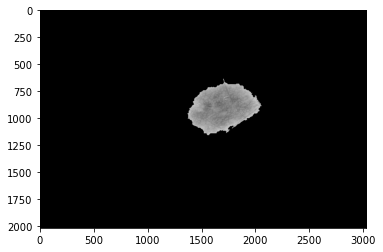

In [14]:
# Load images as Image objects  
img1 = Image.open('data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('data/example_segmentation/ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
# img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)          

In [21]:
# temporary
# print(mask.shape)
# print(im.shape)

xx = np.where(mask == 1)
x = xx[0]
y = xx[1]
im[x,y,:].transpose()

IndexError: tuple index out of range

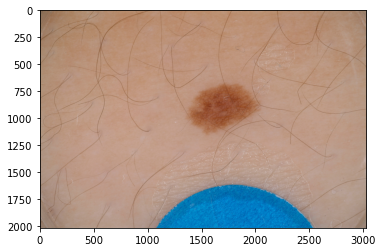

In [29]:
plt.imshow(im)

(2016, 3024, 3)
(2016, 3024)


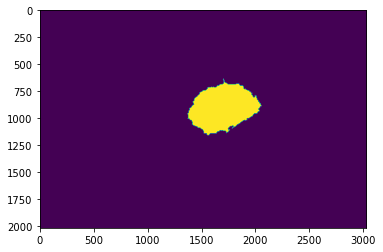

In [32]:
plt.imshow(seg)
print(im.shape)
print(seg.shape)

(2016, 3024)
(2016, 3024)
lbp.ravel()
6096384
np hist
(array([0.05570925, 0.02704193, 0.02051839, 0.01630901, 0.01370107,
       0.01241703, 0.01202024, 0.01270753, 0.01370304, 0.01513061,
       0.01729697, 0.02168302, 0.02642534, 0.02109201, 0.01722119,
       0.01531236, 0.01394515, 0.0133899 , 0.01290437, 0.01373076,
       0.01573195, 0.0186399 , 0.02250465, 0.02401702, 0.06087313,
       0.48597414]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.]))


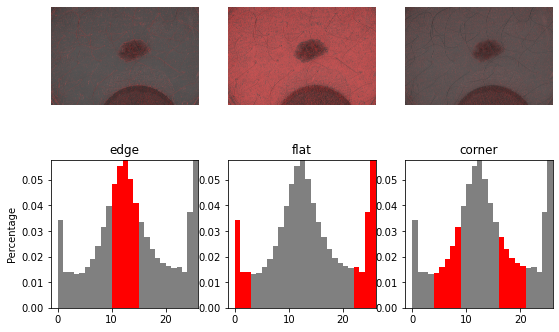

In [71]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
            radius = 3
            n_points = 8 * radius # Number of circularly symmetric neighbour set points
            METHOD = 'uniform'


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


# image = data.brick()
# lbp = local_binary_pattern(image, n_points, radius, METHOD)
segmask = (seg > 0)
grayscale = rgb2gray(im)
image = grayscale
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    # added segmask to only include ROI
    n_bins = int(lbp[segmask].max() + 1)
    return ax.hist(lbp[segmask].ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray() # set colormap to grey

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')
    
    
    
# THIS SHIT    USE MASK    GET AREA OF EDGEBINS, FLATBINS AND CORNER BINS
segmask = (seg > 0)
grayscale = rgb2gray(im)
image = grayscale
lbp = local_binary_pattern(image, n_points, radius, METHOD)
print(image.shape)
print(lbp.shape)
print("lbp.ravel()")
print(len(lbp.ravel()))
print("np hist")
n_bins = int(lbp.max() + 1)
print(np.histogram(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins)))

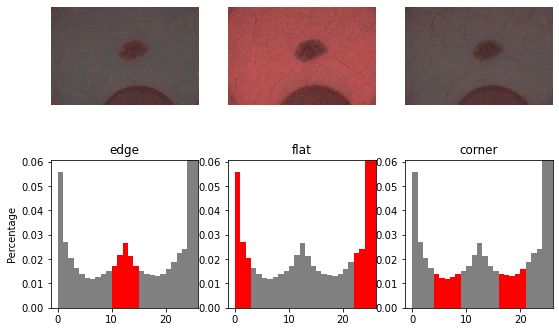

In [55]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
radius = 3
n_points = 8 * radius # Number of circularly symmetric neighbour set points
METHOD = 'uniform'


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')

segmask = (seg > 0)
grayscale = rgb2gray(im)
image = grayscale
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray() # set colormap to grey

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

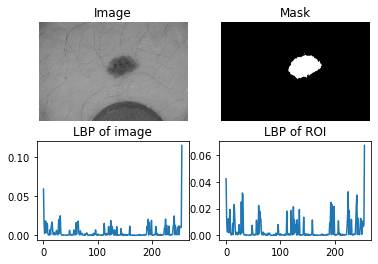

In [51]:
R = 1
P = 8
dim = 2**P
h_bins = np.arange(dim+1)
h_range = (0, dim)

# img = io.imread('https://i.stack.imgur.com/6ESoP.png')
grayscale = rgb2gray(im)
img = grayscale
mask = (seg > 0)
codes = local_binary_pattern(img, P, R)
h_img, _ = np.histogram(codes.ravel(), bins=h_bins, range=h_range)
h_masked, _ = np.histogram(codes[mask], bins=h_bins, range=h_range)
# h_img, _ = np.histogram(codes.ravel(), bins=30)
# h_masked, _ = np.histogram(codes[mask], bins=30)
h_img = h_img/h_img.sum(dtype=np.float)
h_masked = h_masked/h_masked.sum(dtype=np.float)

f, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2)
ax0.imshow(img, cmap=plt.cm.gray)
ax0.axis('off')
ax0.set_title('Image')
ax1.imshow(mask, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Mask')
ax2.plot(h_img)
ax2.set_title('LBP of image')
ax3.plot(h_masked)
ax3.set_title('LBP of ROI')
plt.show(f)


In [48]:
(seg > 0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [49]:
seg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)